In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import librosa
import librosa.display
import numpy as np
import os
import soundfile as sf
import random
def add_noise(audio, noise_level=0.005):
    noise = np.random.randn(len(audio)) * noise_level
    return audio + noise


In [ ]:
input_folder = "/content/drive/MyDrive/data"  # Change path
output_folder = "/content/drive/MyDrive/dataset_balanced"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for file in os.listdir(input_folder):
    if file.endswith(".wav"):
        file_path = os.path.join(input_folder, file)
        audio, sr = librosa.load(file_path, sr=None)

        # Add noise
        noisy_audio = add_noise(audio)

        # Save the new audio file
        output_path = os.path.join(output_folder, "noisy_" + file)
        sf.write(output_path, noisy_audio, sr)

print("Dataset augmentation complete!")


Dataset augmentation complete!


In [ ]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Define file paths
base_path = '/content/drive/MyDrive/data'
class_paths = {
    "environment": os.path.join(base_path, 'Environment'),
    "music": os.path.join(base_path, 'music_wav'),
    "speech": os.path.join(base_path, 'speech_wav')
}

# Prepare dataset
X, y = [], []
class_labels = {"environment": 0, "music": 1, "speech": 2}

def load_audio(filepath, sr=22050, duration=10): #added duration parameter, default 10 seconds
    y, _ = librosa.load(filepath, sr=sr, duration=duration) # load audio with fixed duration
    # Pass y and sr as keyword arguments to melspectrogram
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
    log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
    # Pad or truncate the mel spectrogram to a fixed length
    max_length = 128  # Set your desired fixed length
    if mel_spec.shape[1] < max_length:
        pad_width = max_length - mel_spec.shape[1]
        mel_spec = np.pad(mel_spec, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mel_spec = mel_spec[:, :max_length]

    log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

    return log_mel_spec, y

# Load audio data and labels
for label, folder in class_paths.items():
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        mel_spec, y_audio = load_audio(file_path)
        X.append(mel_spec)
        y.append(class_labels[label])

# Convert lists to arrays
X = np.array(X)
X = X.reshape(-1, X.shape[1], X.shape[2], 1)  # Reshape for CNN input
y = to_categorical(y, num_classes=3)  # One-hot encode labels

# Display size of data
print(f"Dataset size: {X.shape[0]} samples, each of shape {X[0].shape}")

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(X.shape[1], X.shape[2], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(3, activation="softmax")  # 3 classes: environment, music, speech
])
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

Dataset size: 402 samples, each of shape (128, 128, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.5247 - loss: 1.0148 - val_accuracy: 0.7160 - val_loss: 0.7832
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6741 - loss: 0.8621 - val_accuracy: 0.7160 - val_loss: 0.8099
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6786 - loss: 0.8452 - val_accuracy: 0.7160 - val_loss: 0.7556
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6559 - loss: 0.8330 - val_accuracy: 0.7160 - val_loss: 0.7605
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6494 - loss: 0.8262 - val_accuracy: 0.7037 - val_loss: 0.7320
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6730 - loss: 0.7839 - val_accuracy: 0.7160 - val_loss: 0.7190
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6756 - loss: 0.7607 - val_accuracy: 0.7160 - val_loss: 0.7374
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6795 - loss: 0.7812 - val_accuracy: 0.

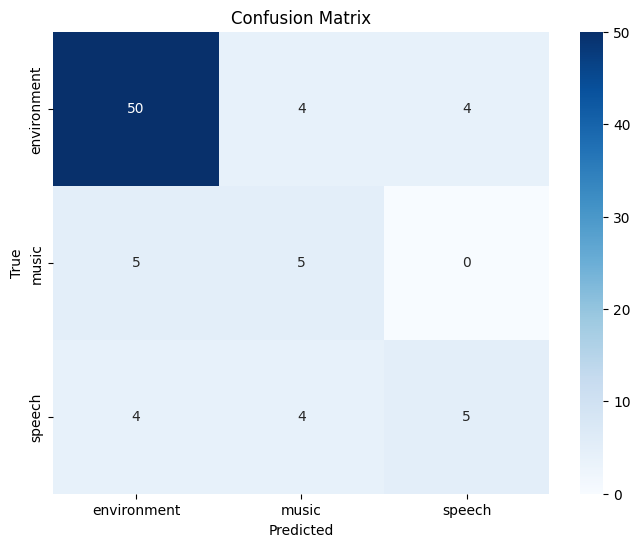

Classification Report:
               precision    recall  f1-score   support

 environment       0.85      0.86      0.85        58
       music       0.38      0.50      0.43        10
      speech       0.56      0.38      0.45        13

    accuracy                           0.74        81
   macro avg       0.60      0.58      0.58        81
weighted avg       0.74      0.74      0.74        81

Number of files in environment: 274
Number of files in music: 64
Number of files in speech: 64


In [ ]:


import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import IPython.display as ipd

# Define file paths
base_path = '/content/drive/MyDrive/data'
class_paths = {
    "environment": os.path.join(base_path, 'Environment'),
    "music": os.path.join(base_path, 'music_wav'),
    "speech": os.path.join(base_path, 'speech_wav')
}

# Prepare dataset
X, y = [], []
class_labels = {"environment": 0, "music": 1, "speech": 2}

def load_audio(filepath, sr=22050, duration=10):
    y, _ = librosa.load(filepath, sr=sr, duration=duration)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    mfccs_processed = np.mean(mfccs.T, axis=0)
    return mfccs_processed, y

# Load audio data and labels
for label, folder in class_paths.items():
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        try:
            mfccs, y_audio = load_audio(file_path)
            X.append(mfccs)
            y.append(class_labels[label])
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

# Convert lists to arrays
X = np.array(X)
X = X.reshape(X.shape[0], X.shape[1], 1)
y = to_categorical(y, num_classes=3)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate classifier
y_pred = model.predict(X_test).argmax(axis=1)
y_test_labels = y_test.argmax(axis=1)

accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Model accuracy: {accuracy}")

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_labels, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels.keys(), yticklabels=class_labels.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n", classification_report(y_test_labels, y_pred, target_names=class_labels.keys()))

for label, folder in class_paths.items():
    num_files = len(os.listdir(folder))
    print(f"Number of files in {label}: {num_files}")



In [ ]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import seaborn as sns

# Define file paths
base_path = '/content/drive/MyDrive/data'
class_paths = {
    "environment": os.path.join(base_path, 'Environment'),
    "music": os.path.join(base_path, 'music_wav'),
    "speech": os.path.join(base_path, 'speech_wav')
}

# Prepare dataset
X, y = [], []
class_labels = {"environment": 0, "music": 1, "speech": 2}

def load_audio(filepath, sr=22050, duration=10):
    y, _ = librosa.load(filepath, sr=sr, duration=duration)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    mfccs_processed = np.mean(mfccs.T, axis=0)
    return mfccs_processed, y

# Load audio data and labels
for label, folder in class_paths.items():
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        try:
            mfccs, y_audio = load_audio(file_path)
            X.append(mfccs)
            y.append(class_labels[label])
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

# Convert lists to arrays and reshape for CNN
X = np.array(X)
X = X.reshape(X.shape[0], X.shape[1], 1, 1)  # Reshape for CNN input
y = to_categorical(y, num_classes=3)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build CNN model
model = Sequential()
model.add(Conv2D(32, (3, 1), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1))) # Change kernel size to (3, 1)
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 1), activation='relu')) # Change kernel size to (3, 1)
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))  # Adjust epochs and batch_size as needed

# Evaluate classifier
y_pred = model.predict(X_test).argmax(axis=1)
y_test_labels = y_test.argmax(axis=1)

accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Model accuracy: {accuracy}")

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_labels, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels.keys(), yticklabels=class_labels.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n", classification_report(y_test_labels, y_pred, target_names=class_labels.keys()))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


ValueError: Exception encountered when calling MaxPooling2D.call().

[1mNegative dimension size caused by subtracting 2 from 1 for '{{node sequential_1_1/max_pooling2d_1/MaxPool2d}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](sequential_1_1/conv2d_1_1/Relu)' with input shapes: [?,38,1,32].[0m

Arguments received by MaxPooling2D.call():
  • inputs=tf.Tensor(shape=(None, 38, 1, 32), dtype=float32)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.4504 - loss: 1.0688 - val_accuracy: 0.7160 - val_loss: 0.7979
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6566 - loss: 0.8989 - val_accuracy: 0.7160 - val_loss: 0.7757
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6661 - loss: 0.8789 - val_accuracy: 0.7160 - val_loss: 0.7727
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6750 - loss: 0.8190 - val_accuracy: 0.7160 - val_loss: 0.7523
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6792 - loss: 0.7987 - val_accuracy: 0.6790 - val_loss: 0.7949
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6377 - loss: 0.8246 - val_accuracy: 0.6173 - val_loss: 0.8246
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6364 - loss: 0.8085 - val_accuracy: 0.6543 - val_loss: 0.7498
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7141 - loss: 0.7233 - val_accuracy: 0.6667 - val_l

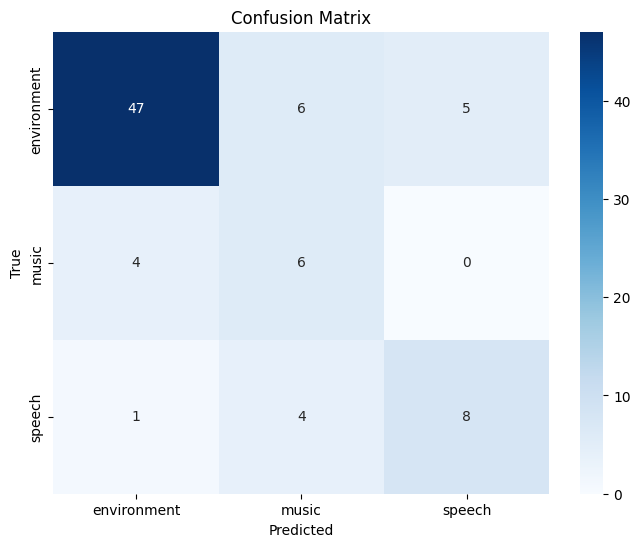

Classification Report:
               precision    recall  f1-score   support

 environment       0.90      0.81      0.85        58
       music       0.38      0.60      0.46        10
      speech       0.62      0.62      0.62        13

    accuracy                           0.75        81
   macro avg       0.63      0.68      0.64        81
weighted avg       0.79      0.75      0.77        81

Number of files in environment: 274
Number of files in music: 64
Number of files in speech: 64


In [ ]:

import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import seaborn as sns


# Define file paths
base_path = '/content/drive/MyDrive/data'
class_paths = {
    "environment": os.path.join(base_path, 'Environment'),
    "music": os.path.join(base_path, 'music_wav'),
    "speech": os.path.join(base_path, 'speech_wav')
}

# Prepare dataset
X, y = [], []
class_labels = {"environment": 0, "music": 1, "speech": 2}

def load_audio(filepath, sr=22050, duration=10):
    try:
        y, _ = librosa.load(filepath, sr=sr, duration=duration)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
        mfccs_processed = np.mean(mfccs.T, axis=0)
        return mfccs_processed, y
    except Exception as e:
        print(f"Error loading {filepath}: {e}")
        return None, None

# Load audio data and labels
for label, folder in class_paths.items():
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        mfccs, _ = load_audio(file_path)
        if mfccs is not None:  # Check if loading was successful
            X.append(mfccs)
            y.append(class_labels[label])

# Convert lists to arrays
X = np.array(X)
X = X.reshape(X.shape[0], X.shape[1], 1)
y = to_categorical(y, num_classes=3)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate classifier
y_pred = model.predict(X_test).argmax(axis=1)
y_test_labels = y_test.argmax(axis=1)

accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Model accuracy: {accuracy}")

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_labels, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels.keys(), yticklabels=class_labels.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n", classification_report(y_test_labels, y_pred, target_names=class_labels.keys()))

# Number of files
for label, folder in class_paths.items():
    num_files = len(os.listdir(folder))
    print(f"Number of files in {label}: {num_files}")

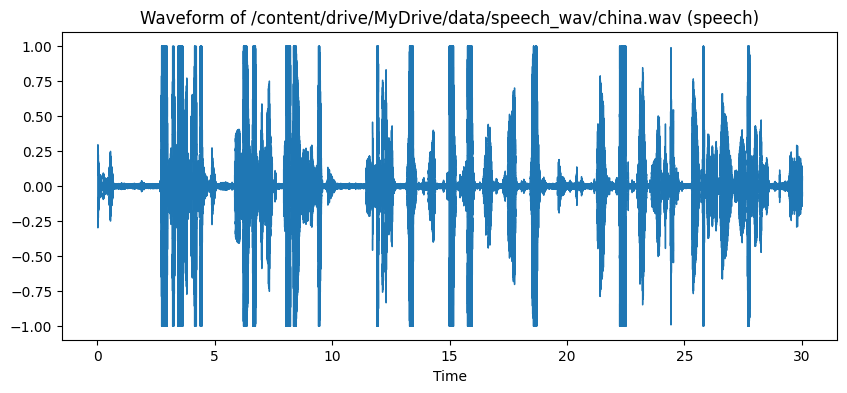

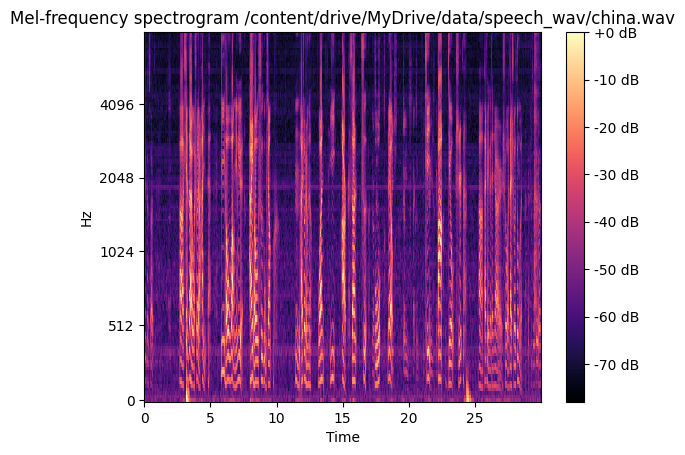

File: /content/drive/MyDrive/data/speech_wav/china.wav
Classified as: speech


In [ ]:

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def analyze_audio(file_path):
    try:
        # Load audio file
        y, sr = librosa.load(file_path)

        # Classify audio (replace with your actual classification logic)
        # This is a placeholder, you need to implement your classification model here
        if "environment" in file_path.lower():
            audio_class = "environment"
        elif "music" in file_path.lower():
            audio_class = "music"
        elif "speech" in file_path.lower():
            audio_class = "speech"
        else:
            audio_class = "unknown"  # Default to unknown if no match

        # Generate and display waveform
        plt.figure(figsize=(10, 4))
        librosa.display.waveshow(y, sr=sr)
        plt.title(f"Waveform of {file_path} ({audio_class})")
        plt.show()

        # Display Mel Spectrogram (optional visualization)
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
        fig, ax = plt.subplots()
        S_dB = librosa.power_to_db(S, ref=np.max)
        img = librosa.display.specshow(S_dB, x_axis='time',
                                       y_axis='mel', sr=sr,
                                       fmax=8000, ax=ax)
        fig.colorbar(img, ax=ax, format="%+2.f dB")
        ax.set(title=f'Mel-frequency spectrogram {file_path}')
        plt.show()


        print(f"File: {file_path}")
        print(f"Classified as: {audio_class}")

    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Example usage (replace with your file path)
file_path = "/content/drive/MyDrive/data/speech_wav/china.wav"
analyze_audio(file_path)
# prompt: play the audio of the given input file in above cell

import IPython.display as ipd
ipd.Audio(file_path)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9764 - loss: 0.0494 - val_accuracy: 0.7531 - val_loss: 0.7875
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9854 - loss: 0.0499 - val_accuracy: 0.7654 - val_loss: 0.7910
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9962 - loss: 0.0387 - val_accuracy: 0.7531 - val_loss: 0.8943
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9289 - loss: 0.2138 - val_accuracy: 0.7531 - val_loss: 0.8655
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9250 - loss: 0.1642 - val_accuracy: 0.7284 - val_loss: 0.8397
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9686 - loss: 0.0920 - val_accuracy: 0.7407 - val_loss: 0.7758
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9608 - loss: 0.1102 - val_accuracy: 0.7407 - val_loss: 0.9074
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9332 - loss: 0.2817 - val_accuracy: 0.

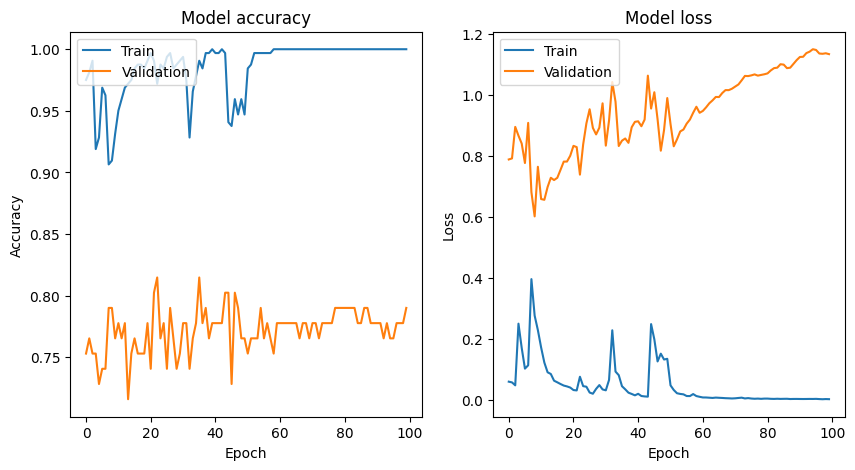

In [ ]:
# prompt: plot graph between loss,accuracy vs epoch plot

import matplotlib.pyplot as plt

# Assuming 'history' object is available from model.fit()
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test)) # Assign the result of model.fit to history

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


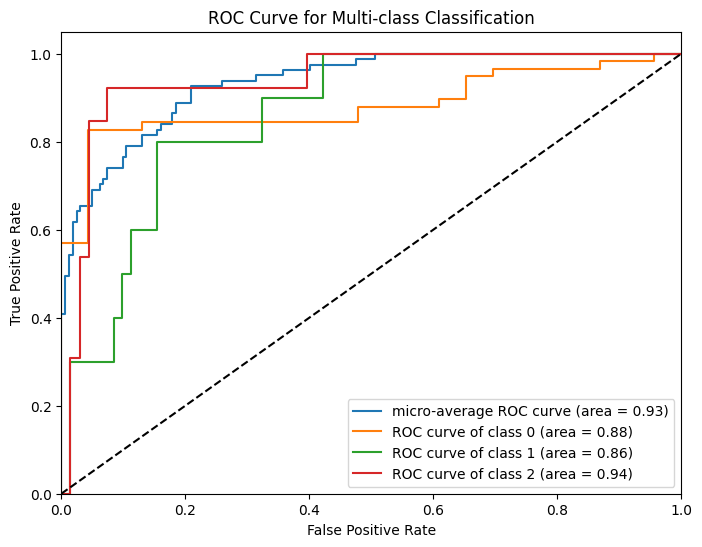

In [ ]:
# prompt: give roc curve for cnn

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# ... (Your existing code) ...

# Evaluate classifier and get probabilities
y_pred_prob = model.predict(X_test)

# Binarize the output
y_test_bin = label_binarize(y_test_labels, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for the multiclass problem
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class Classification')
plt.legend(loc="lower right")
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


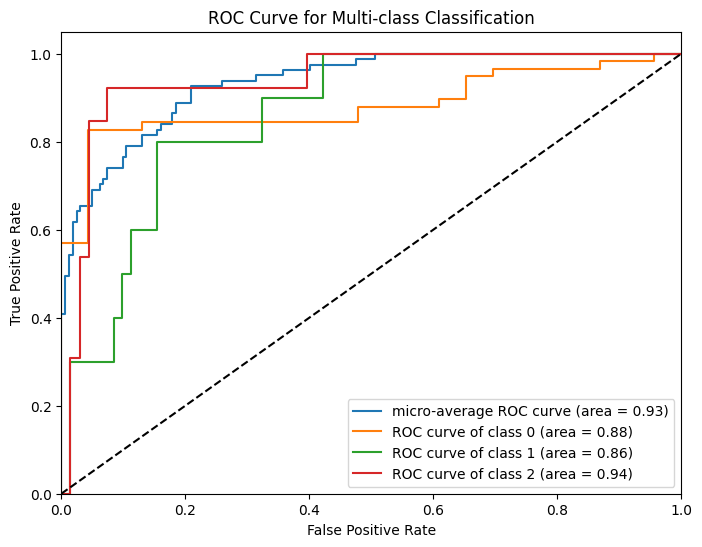

In [ ]:
# prompt: give roc for lstm from dataset

# ... (Your existing code) ...

# Evaluate classifier and get probabilities
y_pred_prob = model.predict(X_test)

# Binarize the output
y_test_bin = label_binarize(y_test_labels, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for the multiclass problem
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class Classification')
plt.legend(loc="lower right")
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


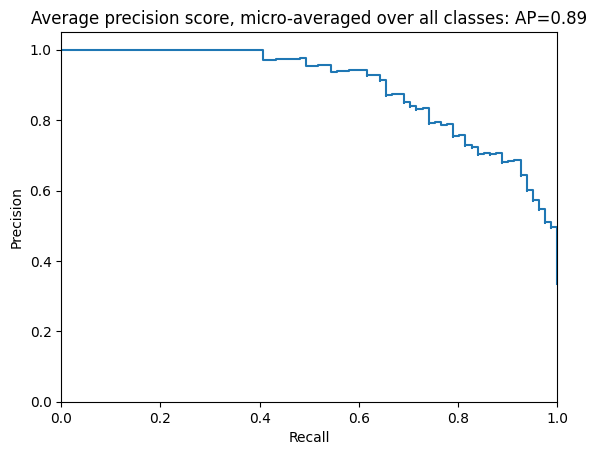

In [ ]:
# prompt: print precision recall curve frm the dataset used

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize

# ... (Your existing code) ...

# Evaluate classifier and get probabilities
y_pred_prob = model.predict(X_test)

# Binarize the output
y_test_bin = label_binarize(y_test_labels, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i],
                                                        y_pred_prob[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_prob[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(),
    y_pred_prob.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_pred_prob,
                                                     average="micro")


plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))
plt.show()

In [ ]:


print(f"Dataset size: {X.shape[0]} samples, each of shape {X[0].shape}")


Dataset size: 402 samples, each of shape (40, 1)


In [ ]:


import scipy.stats as stats
import numpy as np
import os
import librosa
from tensorflow.keras.utils import to_categorical

# Define file paths
base_path = '/content/drive/MyDrive/data'
class_paths = {
    "environment": os.path.join(base_path, 'Environment'),
    "music": os.path.join(base_path, 'music_wav'),
    "speech": os.path.join(base_path, 'speech_wav')
}

# Prepare dataset
X, y = [], []
class_labels = {"environment": 0, "music": 1, "speech": 2}

def load_audio(filepath, sr=22050, duration=10):
    y_audio, _ = librosa.load(filepath, sr=sr, duration=duration)
    mfccs = librosa.feature.mfcc(y=y_audio, sr=sr, n_mfcc=40)
    mfccs_processed = np.mean(mfccs.T, axis=0)
    return mfccs_processed, y_audio

# Load audio data and labels
for label, folder in class_paths.items():
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        try:
            mfccs, y_audio = load_audio(file_path)
            X.append(mfccs)
            y.append(class_labels[label])
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

# Convert lists to arrays
X = np.array(X)
#X = X.reshape(X.shape[0], X.shape[1], 1) # This line may not be needed for statistical tests
y = to_categorical(y, num_classes=3)


In [ ]:


import scipy.stats as stats
import numpy as np # Import the numpy library and assign it the alias 'np'

# Calculate means for each class
environment_mean = np.mean(X[np.where(np.argmax(y, axis=1) == 0)])
music_mean = np.mean(X[np.where(np.argmax(y, axis=1) == 1)])
speech_mean = np.mean(X[np.where(np.argmax(y, axis=1) == 2)])


# Perform Z-tests (compare each pair of means)
z_statistic_env_music, p_value_env_music = stats.ttest_ind(
    X[np.where(np.argmax(y, axis=1) == 0)],
    X[np.where(np.argmax(y, axis=1) == 1)]
)

z_statistic_music_speech, p_value_music_speech = stats.ttest_ind(
    X[np.where(np.argmax(y, axis=1) == 1)],
    X[np.where(np.argmax(y, axis=1) == 2)]
)

z_statistic_env_speech, p_value_env_speech = stats.ttest_ind(
    X[np.where(np.argmax(y, axis=1) == 0)],
    X[np.where(np.argmax(y, axis=1) == 2)]
)

print("Z-test (environment vs music): statistic =", z_statistic_env_music, "p-value =", p_value_env_music)
print("Z-test (music vs speech): statistic =", z_statistic_music_speech, "p-value =", p_value_music_speech)
print("Z-test (environment vs speech): statistic =", z_statistic_env_speech, "p-value =", p_value_env_speech)


# Perform T-tests
t_statistic_env_music, p_value_env_music = stats.ttest_ind(
    X[np.where(np.argmax(y, axis=1) == 0)],
    X[np.where(np.argmax(y, axis=1) == 1)]
)
t_statistic_music_speech, p_value_music_speech = stats.ttest_ind(
    X[np.where(np.argmax(y, axis=1) == 1)],
    X[np.where(np.argmax(y, axis=1) == 2)]
)
t_statistic_env_speech, p_value_env_speech = stats.ttest_ind(
    X[np.where(np.argmax(y, axis=1) == 0)],
    X[np.where(np.argmax(y, axis=1) == 2)]
)

print("T-test (environment vs music): statistic =", t_statistic_env_music, "p-value =", p_value_env_music)
print("T-test (music vs speech): statistic =", t_statistic_music_speech, "p-value =", p_value_music_speech)
print("T-test (environment vs speech): statistic =", t_statistic_env_speech, "p-value =", p_value_env_speech)


#Perform ANOVA
from scipy.stats import f_oneway

f_statistic, p_value = f_oneway(
    X[np.where(np.argmax(y, axis=1) == 0)],
    X[np.where(np.argmax(y, axis=1) == 1)],
    X[np.where(np.argmax(y, axis=1) == 2)]
)
print("ANOVA: F-statistic =", f_statistic, "p-value =", p_value)

# Perform F-test (assuming you want to compare variances)
f_statistic_env_music, p_value_env_music = stats.levene(
    X[np.where(np.argmax(y, axis=1) == 0)],
    X[np.where(np.argmax(y, axis=1) == 1)]
)

f_statistic_music_speech, p_value_music_speech = stats.levene(
    X[np.where(np.argmax(y, axis=1) == 1)],
    X[np.where(np.argmax(y, axis=1) == 2)]
)

f_statistic_env_speech, p_value_env_speech = stats.levene(
    X[np.where(np.argmax(y, axis=1) == 0)],
    X[np.where(np.argmax(y, axis=1) == 2)]
)


print("F-test (environment vs music): statistic =", f_statistic_env_music, "p-value =", p_value_env_music)
print("F-test (music vs speech): statistic =", f_statistic_music_speech, "p-value =", p_value_music_speech)
print("F-test (environment vs speech): statistic =", f_statistic_env_speech, "p-value =", p_value_env_speech)

Z-test (environment vs music): statistic = [-3.6406407  -4.9566426  -0.3698082  -6.245757   -3.0478272   1.802472
  1.4223654   1.3836141   2.5757558   0.5755051   1.3084937  -0.2429479
  1.1568409  -0.067485   -1.3349407  -1.0464122  -2.4834769  -0.92115295
 -3.4822974  -0.10781703 -0.28574848 -0.5605848   0.8020239   1.5222913
 -0.04459618 -0.91746634  0.5963341   1.1214305   0.91594726  2.0307972
 -0.737521    0.5083534  -3.2806916   0.23968644 -1.6969393   1.5082606
 -1.8007973   2.4210129  -2.4928105   3.210681  ] p-value = [3.14793425e-04 1.13962491e-06 7.11758381e-01 1.27450905e-09
 2.48776919e-03 7.23671931e-02 1.55847857e-01 1.67395164e-01
 1.04289733e-02 5.65334969e-01 1.91600231e-01 8.08193996e-01
 2.48159149e-01 9.46235739e-01 1.82799553e-01 2.96122924e-01
 1.34978609e-02 3.57631483e-01 5.62837246e-04 9.14205184e-01
 7.75246849e-01 5.75454230e-01 4.23106004e-01 1.28876652e-01
 9.64455682e-01 3.59556395e-01 5.51353592e-01 2.62905467e-01
 3.60351463e-01 4.30625897e-02 4.61320